# Classification

### This tutorial will use MNIST dataset that has 70,000 images of handwritten digits.<br/>(Each image is labeled a digit, which has 784=(28x28 pixels) features)

#### First, check scikit-learn version

In [2]:
import sklearn
sklearn.__version__  # '0.19.1'

'0.21.3'

#### Since we want to use scikit-learn version 0.2 or later, if it is older, we may need to install it something likes below.

>>> conda update conda
>>> conda install scikit-learn=0.21.3

#### To know where is "get_data_home" folder

In [5]:
from sklearn.datasets import get_data_home
# print(get_data_home()) # Ex. C:\Users\...\scikit_learn_data

#### To get MNIST datasets

In [9]:
from sklearn.datasets import fetch_openml # fetch_openml is used from scikit-learn 0.2 or later.
mnist = fetch_openml('mnist_784', version=1)

#### To know the mnist data type and structure

In [11]:
type(mnist) # Bunch objects are just useful for loading the internal sample datasets at scikit-learn

sklearn.utils.Bunch

In [10]:
mnist.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

###### The 'data' key contains an arrary: one rows per instance and one column per feature.<br/>The 'target' contains an array with labels

In [14]:
X, y = mnist['data'], mnist['target']
print('X.shape={}, y.shape={}'.format(X.shape, y.shape))

X.shape=(70000, 784), y.shape=(70000,)


##### Each image is labeled a digit, which has 784=(28x28 pixels) features.<br/> And each feature represents pixel's intensity (from 0 (white) to 255 (black))<br/>We will show 1 image example, as below.

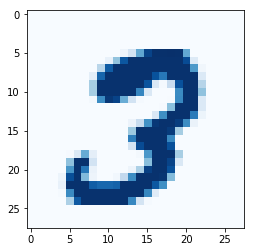

In [23]:
import matplotlib.pyplot as plt
_index = 12345
a_digit = X[_index]  # choose an arbitrary digit of X
a_digit_img = a_digit.reshape(28, 28) # reshape 784 --> 28x28
plt.imshow(a_digit_img, cmap="Blues", interpolation='nearest')

##### The above image looks like 3. Let's check its target value

In [24]:
y[_index]  # Yes. it is '3'. We may need to change a string to a number

'3'

In [25]:
y = y.astype(int)

In [26]:
y[_index]

3